#Carga de Datos

In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os 

df_caracteristicas_equipos = pd.read_csv('../data/Caracteristicas_Equipos.csv')
df_caracteristicas_equipos
df_historicos_ordenes = pd.read_csv('../data/Historicos_Ordenes.csv')
df_historicos_ordenes
df_registros_condiciones = pd.read_csv('../data/Registros_Condiciones.csv')
df_registros_condiciones

ID_Registro  ID_Equipo                Fecha  Temperatura_C  \
0               1        260  2020-01-01 00:00:00         101.43   
1               2        376  2020-01-01 01:00:00         118.51   
2               3        443  2020-01-01 02:00:00          76.04   
3               4        281  2020-01-01 03:00:00          97.09   
4               5        427  2020-01-01 04:00:00         139.42   
...           ...        ...                  ...            ...   
8995         8996        299  2021-01-09 19:00:00          51.08   
8996         8997        160  2021-01-09 20:00:00         122.18   
8997         8998        160  2021-01-09 21:00:00         119.70   
8998         8999         45  2021-01-09 22:00:00          57.77   
8999         9000         61  2021-01-09 23:00:00         130.10   

      Vibracion_mm_s  Horas_Operativas  
0               1.22           71849.0  
1               2.97           49670.0  
2               2.93           33106.0  
3               3.25           31744.0  
4               4.22           78104.0  
...              ...               ...  
8995            2.32           97743.0  
8996            2.65           84374.0  
8997            2.98           16939.0  
8998            3.39           86679.0  
8999            4.06           46702.0  

[9000 rows x 6 columns]

Revisión Nulos

In [3]:
df_caracteristicas_equipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID_Equipo                    505 non-null    int64  
 1   Tipo_Equipo                  505 non-null    object 
 2   Fabricante                   505 non-null    object 
 3   Modelo                       505 non-null    object 
 4   Potencia_kW                  505 non-null    float64
 5   Horas_Recomendadas_Revision  505 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 23.8+ KB


In [4]:
df_historicos_ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10020 entries, 0 to 10019
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_Orden             10020 non-null  int64  
 1   ID_Equipo            10020 non-null  int64  
 2   Fecha                10020 non-null  object 
 3   Tipo_Mantenimiento   10020 non-null  object 
 4   Costo_Mantenimiento  9971 non-null   float64
 5   Duracion_Horas       10020 non-null  int64  
 6   Ubicacion            10020 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 548.1+ KB


In [5]:
df_historicos_ordenes.head()

ID_Orden  ID_Equipo                Fecha Tipo_Mantenimiento  \
0         1         36  2020-01-01 00:00:00         Preventivo   
1         2        244  2020-01-01 01:00:00         Preventivo   
2         3        297  2020-01-01 02:00:00         Preventivo   
3         4        431  2020-01-01 03:00:00         Correctivo   
4         5        403  2020-01-01 04:00:00         Correctivo   

   Costo_Mantenimiento  Duracion_Horas     Ubicacion  
0              6754.12               3  Planta Norte  
1              4274.63              35  Planta Norte  
2              5752.00              25  Planta Norte  
3              5690.14               8    Planta Sur  
4              7048.79              28  Planta Norte

In [6]:
df_historicos_ordenes.tail()

ID_Orden  ID_Equipo                Fecha Tipo_Mantenimiento  \
10015        16        203  2020-01-01 15:00:00         Preventivo   
10016        17        386  2020-01-01 16:00:00         Preventivo   
10017        18        122  2020-01-01 17:00:00         Preventivo   
10018        19         33  2020-01-01 18:00:00         Preventivo   
10019        20        390  2020-01-01 19:00:00         Correctivo   

       Costo_Mantenimiento  Duracion_Horas     Ubicacion  
10015               320.94              46  Planta Norte  
10016              2806.72              20  Planta Oeste  
10017              8919.97              14  Planta Norte  
10018              6522.17              24    Planta Sur  
10019              1416.80              37    Planta Sur

In [7]:
df_historicos_ordenes.isna().sum()

ID_Orden                0
ID_Equipo               0
Fecha                   0
Tipo_Mantenimiento      0
Costo_Mantenimiento    49
Duracion_Horas          0
Ubicacion               0
dtype: int64

In [8]:
del_df_historicos_ordenes = df_historicos_ordenes.dropna()
del_df_historicos_ordenes

ID_Orden  ID_Equipo                Fecha Tipo_Mantenimiento  \
0             1         36  2020-01-01 00:00:00         Preventivo   
1             2        244  2020-01-01 01:00:00         Preventivo   
2             3        297  2020-01-01 02:00:00         Preventivo   
3             4        431  2020-01-01 03:00:00         Correctivo   
4             5        403  2020-01-01 04:00:00         Correctivo   
...         ...        ...                  ...                ...   
10015        16        203  2020-01-01 15:00:00         Preventivo   
10016        17        386  2020-01-01 16:00:00         Preventivo   
10017        18        122  2020-01-01 17:00:00         Preventivo   
10018        19         33  2020-01-01 18:00:00         Preventivo   
10019        20        390  2020-01-01 19:00:00         Correctivo   

       Costo_Mantenimiento  Duracion_Horas     Ubicacion  
0                  6754.12               3  Planta Norte  
1                  4274.63              35  Planta Norte  
2                  5752.00              25  Planta Norte  
3                  5690.14               8    Planta Sur  
4                  7048.79              28  Planta Norte  
...                    ...             ...           ...  
10015               320.94              46  Planta Norte  
10016              2806.72              20  Planta Oeste  
10017              8919.97              14  Planta Norte  
10018              6522.17              24    Planta Sur  
10019              1416.80              37    Planta Sur  

[9971 rows x 7 columns]

In [9]:
del_df_historicos_ordenes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9971 entries, 0 to 10019
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_Orden             9971 non-null   int64  
 1   ID_Equipo            9971 non-null   int64  
 2   Fecha                9971 non-null   object 
 3   Tipo_Mantenimiento   9971 non-null   object 
 4   Costo_Mantenimiento  9971 non-null   float64
 5   Duracion_Horas       9971 non-null   int64  
 6   Ubicacion            9971 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 623.2+ KB


In [10]:
df_registros_condiciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Registro       9000 non-null   int64  
 1   ID_Equipo         9000 non-null   int64  
 2   Fecha             9000 non-null   object 
 3   Temperatura_C     9000 non-null   float64
 4   Vibracion_mm_s    9000 non-null   float64
 5   Horas_Operativas  8960 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 422.0+ KB


In [11]:
df_registros_condiciones.head()

ID_Registro  ID_Equipo                Fecha  Temperatura_C  Vibracion_mm_s  \
0            1        260  2020-01-01 00:00:00         101.43            1.22   
1            2        376  2020-01-01 01:00:00         118.51            2.97   
2            3        443  2020-01-01 02:00:00          76.04            2.93   
3            4        281  2020-01-01 03:00:00          97.09            3.25   
4            5        427  2020-01-01 04:00:00         139.42            4.22   

   Horas_Operativas  
0           71849.0  
1           49670.0  
2           33106.0  
3           31744.0  
4           78104.0

In [12]:
df_registros_condiciones.tail()

ID_Registro  ID_Equipo                Fecha  Temperatura_C  \
8995         8996        299  2021-01-09 19:00:00          51.08   
8996         8997        160  2021-01-09 20:00:00         122.18   
8997         8998        160  2021-01-09 21:00:00         119.70   
8998         8999         45  2021-01-09 22:00:00          57.77   
8999         9000         61  2021-01-09 23:00:00         130.10   

      Vibracion_mm_s  Horas_Operativas  
8995            2.32           97743.0  
8996            2.65           84374.0  
8997            2.98           16939.0  
8998            3.39           86679.0  
8999            4.06           46702.0

In [13]:
df_registros_condiciones.isna().sum()

ID_Registro          0
ID_Equipo            0
Fecha                0
Temperatura_C        0
Vibracion_mm_s       0
Horas_Operativas    40
dtype: int64

In [14]:
del_df_registros_condiciones = df_registros_condiciones.dropna()
del_df_registros_condiciones

ID_Registro  ID_Equipo                Fecha  Temperatura_C  \
0               1        260  2020-01-01 00:00:00         101.43   
1               2        376  2020-01-01 01:00:00         118.51   
2               3        443  2020-01-01 02:00:00          76.04   
3               4        281  2020-01-01 03:00:00          97.09   
4               5        427  2020-01-01 04:00:00         139.42   
...           ...        ...                  ...            ...   
8995         8996        299  2021-01-09 19:00:00          51.08   
8996         8997        160  2021-01-09 20:00:00         122.18   
8997         8998        160  2021-01-09 21:00:00         119.70   
8998         8999         45  2021-01-09 22:00:00          57.77   
8999         9000         61  2021-01-09 23:00:00         130.10   

      Vibracion_mm_s  Horas_Operativas  
0               1.22           71849.0  
1               2.97           49670.0  
2               2.93           33106.0  
3               3.25           31744.0  
4               4.22           78104.0  
...              ...               ...  
8995            2.32           97743.0  
8996            2.65           84374.0  
8997            2.98           16939.0  
8998            3.39           86679.0  
8999            4.06           46702.0  

[8960 rows x 6 columns]

In [15]:
del_df_registros_condiciones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8960 entries, 0 to 8999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Registro       8960 non-null   int64  
 1   ID_Equipo         8960 non-null   int64  
 2   Fecha             8960 non-null   object 
 3   Temperatura_C     8960 non-null   float64
 4   Vibracion_mm_s    8960 non-null   float64
 5   Horas_Operativas  8960 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 490.0+ KB


Duplicados

In [16]:
df_caracteristicas_equipos.duplicated().sum()

5

In [17]:
del_df_caracteristicas_equipos = df_caracteristicas_equipos.drop_duplicates()
del_df_caracteristicas_equipos

ID_Equipo    Tipo_Equipo Fabricante Modelo  Potencia_kW  \
0            1      Compresor    Siemens   Z300       3429.0   
1            2  Transformador    Siemens   Y200         75.0   
2            3      Compresor        ABB   Z300       4526.0   
3            4      Compresor         GE   X100       3981.0   
4            5          Motor    Siemens   Y200        377.0   
..         ...            ...        ...    ...          ...   
495        496  Transformador  Schneider   Z300        544.0   
496        497      Compresor         GE   M400       3296.0   
497        498      Generador    Siemens   X100       4231.0   
498        499          Motor    Siemens   Y200       3155.0   
499        500  Transformador         GE   M400       2001.0   

     Horas_Recomendadas_Revision  
0                           7725  
1                           7390  
2                           5238  
3                           8933  
4                           5978  
..                           ...  
495                         3331  
496                         8256  
497                         9047  
498                          932  
499                         2031  

[500 rows x 6 columns]

In [18]:
del_df_historicos_ordenes.duplicated().sum()

20

In [19]:
del_df_historicos_ordenes = del_df_historicos_ordenes.drop_duplicates()
del_df_historicos_ordenes

ID_Orden  ID_Equipo                Fecha Tipo_Mantenimiento  \
0            1         36  2020-01-01 00:00:00         Preventivo   
1            2        244  2020-01-01 01:00:00         Preventivo   
2            3        297  2020-01-01 02:00:00         Preventivo   
3            4        431  2020-01-01 03:00:00         Correctivo   
4            5        403  2020-01-01 04:00:00         Correctivo   
...        ...        ...                  ...                ...   
9995      9996        127  2021-02-20 11:00:00         Correctivo   
9996      9997        237  2021-02-20 12:00:00         Preventivo   
9997      9998        120  2021-02-20 13:00:00         Preventivo   
9998      9999        258  2021-02-20 14:00:00         Preventivo   
9999     10000        125  2021-02-20 15:00:00         Preventivo   

      Costo_Mantenimiento  Duracion_Horas     Ubicacion  
0                 6754.12               3  Planta Norte  
1                 4274.63              35  Planta Norte  
2                 5752.00              25  Planta Norte  
3                 5690.14               8    Planta Sur  
4                 7048.79              28  Planta Norte  
...                   ...             ...           ...  
9995              8326.79              16   Planta Este  
9996              5563.86              32   Planta Este  
9997              3972.80              41    Planta Sur  
9998              9794.29              37  Planta Norte  
9999              8176.84              23  Planta Oeste  

[9951 rows x 7 columns]

In [20]:
del_df_registros_condiciones.duplicated().sum()

0

Inconsistencias

In [21]:
del_df_caracteristicas_equipos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID_Equipo                    500 non-null    int64  
 1   Tipo_Equipo                  500 non-null    object 
 2   Fabricante                   500 non-null    object 
 3   Modelo                       500 non-null    object 
 4   Potencia_kW                  500 non-null    float64
 5   Horas_Recomendadas_Revision  500 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 27.3+ KB


In [22]:
columns_to_convert = ['Tipo_Equipo','Fabricante','Modelo']

del_df_caracteristicas_equipos[columns_to_convert] = del_df_caracteristicas_equipos[columns_to_convert].astype('category')

/tmp/ipykernel_17571/3869328416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del_df_caracteristicas_equipos[columns_to_convert] = del_df_caracteristicas_equipos[columns_to_convert].astype('category')


In [23]:
del_df_caracteristicas_equipos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   ID_Equipo                    500 non-null    int64   
 1   Tipo_Equipo                  500 non-null    category
 2   Fabricante                   500 non-null    category
 3   Modelo                       500 non-null    category
 4   Potencia_kW                  500 non-null    float64 
 5   Horas_Recomendadas_Revision  500 non-null    int64   
dtypes: category(3), float64(1), int64(2)
memory usage: 17.7 KB


In [24]:
columns_to_convert = ['ID_Equipo','Potencia_kW','Horas_Recomendadas_Revision']

del_df_caracteristicas_equipos[columns_to_convert] = del_df_caracteristicas_equipos[columns_to_convert].apply(pd.to_numeric)


/tmp/ipykernel_17571/1357416204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del_df_caracteristicas_equipos[columns_to_convert] = del_df_caracteristicas_equipos[columns_to_convert].apply(pd.to_numeric)


In [25]:
del_df_caracteristicas_equipos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   ID_Equipo                    500 non-null    int64   
 1   Tipo_Equipo                  500 non-null    category
 2   Fabricante                   500 non-null    category
 3   Modelo                       500 non-null    category
 4   Potencia_kW                  500 non-null    float64 
 5   Horas_Recomendadas_Revision  500 non-null    int64   
dtypes: category(3), float64(1), int64(2)
memory usage: 17.7 KB


In [26]:
del_df_caracteristicas_equipos['Tipo_Equipo'].unique()

['Compresor', 'Transformador', 'Motor', 'Generador']
Categories (4, object): ['Compresor', 'Generador', 'Motor', 'Transformador']

In [27]:
del_df_caracteristicas_equipos['Fabricante'].unique()

['Siemens', 'ABB', 'GE', 'Schneider']
Categories (4, object): ['ABB', 'GE', 'Schneider', 'Siemens']

In [28]:
del_df_caracteristicas_equipos['Modelo'].unique()

['Z300', 'Y200', 'X100', 'M400']
Categories (4, object): ['M400', 'X100', 'Y200', 'Z300']

In [29]:
del_df_caracteristicas_equipos.head()

ID_Equipo    Tipo_Equipo Fabricante Modelo  Potencia_kW  \
0          1      Compresor    Siemens   Z300       3429.0   
1          2  Transformador    Siemens   Y200         75.0   
2          3      Compresor        ABB   Z300       4526.0   
3          4      Compresor         GE   X100       3981.0   
4          5          Motor    Siemens   Y200        377.0   

   Horas_Recomendadas_Revision  
0                         7725  
1                         7390  
2                         5238  
3                         8933  
4                         5978

In [30]:
del_df_caracteristicas_equipos.isna().sum()

ID_Equipo                      0
Tipo_Equipo                    0
Fabricante                     0
Modelo                         0
Potencia_kW                    0
Horas_Recomendadas_Revision    0
dtype: int64

In [31]:
del_df_historicos_ordenes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9951 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_Orden             9951 non-null   int64  
 1   ID_Equipo            9951 non-null   int64  
 2   Fecha                9951 non-null   object 
 3   Tipo_Mantenimiento   9951 non-null   object 
 4   Costo_Mantenimiento  9951 non-null   float64
 5   Duracion_Horas       9951 non-null   int64  
 6   Ubicacion            9951 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 621.9+ KB


In [32]:
del_df_historicos_ordenes['Fecha'] = pd.to_datetime(del_df_historicos_ordenes['Fecha'], errors='coerce')

/tmp/ipykernel_17571/4155844324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del_df_historicos_ordenes['Fecha'] = pd.to_datetime(del_df_historicos_ordenes['Fecha'], errors='coerce')


In [33]:
columns_to_convert = ['Tipo_Mantenimiento','Ubicacion']

del_df_historicos_ordenes[columns_to_convert] = del_df_historicos_ordenes[columns_to_convert].astype('category')

/tmp/ipykernel_17571/3719683965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del_df_historicos_ordenes[columns_to_convert] = del_df_historicos_ordenes[columns_to_convert].astype('category')


In [34]:
del_df_historicos_ordenes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9951 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_Orden             9951 non-null   int64         
 1   ID_Equipo            9951 non-null   int64         
 2   Fecha                9951 non-null   datetime64[ns]
 3   Tipo_Mantenimiento   9951 non-null   category      
 4   Costo_Mantenimiento  9951 non-null   float64       
 5   Duracion_Horas       9951 non-null   int64         
 6   Ubicacion            9951 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(1), int64(3)
memory usage: 486.2 KB


In [35]:
columns_to_convert = ['ID_Orden','ID_Equipo','Costo_Mantenimiento', 'Duracion_Horas']

del_df_historicos_ordenes[columns_to_convert] = del_df_historicos_ordenes[columns_to_convert].apply(pd.to_numeric)

/tmp/ipykernel_17571/3969514718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del_df_historicos_ordenes[columns_to_convert] = del_df_historicos_ordenes[columns_to_convert].apply(pd.to_numeric)


In [36]:
del_df_historicos_ordenes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9951 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_Orden             9951 non-null   int64         
 1   ID_Equipo            9951 non-null   int64         
 2   Fecha                9951 non-null   datetime64[ns]
 3   Tipo_Mantenimiento   9951 non-null   category      
 4   Costo_Mantenimiento  9951 non-null   float64       
 5   Duracion_Horas       9951 non-null   int64         
 6   Ubicacion            9951 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(1), int64(3)
memory usage: 486.2 KB


In [37]:
del_df_historicos_ordenes['Tipo_Mantenimiento'].unique()

['Preventivo', 'Correctivo']
Categories (2, object): ['Correctivo', 'Preventivo']

In [38]:
del_df_historicos_ordenes['Ubicacion'].unique()

['Planta Norte', 'Planta Sur', 'Planta Este', 'Planta Oeste']
Categories (4, object): ['Planta Este', 'Planta Norte', 'Planta Oeste', 'Planta Sur']

In [39]:
del_df_historicos_ordenes.head()

ID_Orden  ID_Equipo               Fecha Tipo_Mantenimiento  \
0         1         36 2020-01-01 00:00:00         Preventivo   
1         2        244 2020-01-01 01:00:00         Preventivo   
2         3        297 2020-01-01 02:00:00         Preventivo   
3         4        431 2020-01-01 03:00:00         Correctivo   
4         5        403 2020-01-01 04:00:00         Correctivo   

   Costo_Mantenimiento  Duracion_Horas     Ubicacion  
0              6754.12               3  Planta Norte  
1              4274.63              35  Planta Norte  
2              5752.00              25  Planta Norte  
3              5690.14               8    Planta Sur  
4              7048.79              28  Planta Norte

In [40]:
del_df_registros_condiciones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8960 entries, 0 to 8999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Registro       8960 non-null   int64  
 1   ID_Equipo         8960 non-null   int64  
 2   Fecha             8960 non-null   object 
 3   Temperatura_C     8960 non-null   float64
 4   Vibracion_mm_s    8960 non-null   float64
 5   Horas_Operativas  8960 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 490.0+ KB


In [41]:
del_df_registros_condiciones['Fecha'] = pd.to_datetime(del_df_registros_condiciones['Fecha'], errors='coerce')

/tmp/ipykernel_17571/619741651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del_df_registros_condiciones['Fecha'] = pd.to_datetime(del_df_registros_condiciones['Fecha'], errors='coerce')


In [42]:
del_df_registros_condiciones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8960 entries, 0 to 8999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_Registro       8960 non-null   int64         
 1   ID_Equipo         8960 non-null   int64         
 2   Fecha             8960 non-null   datetime64[ns]
 3   Temperatura_C     8960 non-null   float64       
 4   Vibracion_mm_s    8960 non-null   float64       
 5   Horas_Operativas  8960 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 490.0 KB


In [43]:
columns_to_convert = ['ID_Registro','ID_Equipo','Temperatura_C', 'Vibracion_mm_s','Horas_Operativas']

del_df_registros_condiciones[columns_to_convert] = del_df_registros_condiciones[columns_to_convert].apply(pd.to_numeric)

/tmp/ipykernel_17571/2333560292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del_df_registros_condiciones[columns_to_convert] = del_df_registros_condiciones[columns_to_convert].apply(pd.to_numeric)


In [44]:
del_df_registros_condiciones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8960 entries, 0 to 8999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_Registro       8960 non-null   int64         
 1   ID_Equipo         8960 non-null   int64         
 2   Fecha             8960 non-null   datetime64[ns]
 3   Temperatura_C     8960 non-null   float64       
 4   Vibracion_mm_s    8960 non-null   float64       
 5   Horas_Operativas  8960 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 490.0 KB


In [45]:
del_df_registros_condiciones.head()

ID_Registro  ID_Equipo               Fecha  Temperatura_C  Vibracion_mm_s  \
0            1        260 2020-01-01 00:00:00         101.43            1.22   
1            2        376 2020-01-01 01:00:00         118.51            2.97   
2            3        443 2020-01-01 02:00:00          76.04            2.93   
3            4        281 2020-01-01 03:00:00          97.09            3.25   
4            5        427 2020-01-01 04:00:00         139.42            4.22   

   Horas_Operativas  
0           71849.0  
1           49670.0  
2           33106.0  
3           31744.0  
4           78104.0

Agregar nuevas columnas relevantes

Frecuencia de Mantenimiento

In [46]:
del_df_historicos_ordenes.sample(10)

ID_Orden  ID_Equipo               Fecha Tipo_Mantenimiento  \
3902      3903        285 2020-06-11 14:00:00         Correctivo   
5898      5899        105 2020-09-02 18:00:00         Preventivo   
7620      7621        426 2020-11-13 12:00:00         Correctivo   
8653      8654        310 2020-12-26 13:00:00         Correctivo   
9880      9881        279 2021-02-15 16:00:00         Correctivo   
772        773        303 2020-02-02 04:00:00         Correctivo   
9089      9090        215 2021-01-13 17:00:00         Correctivo   
4295      4296         73 2020-06-27 23:00:00         Preventivo   
9738      9739        416 2021-02-09 18:00:00         Correctivo   
8282      8283        206 2020-12-11 02:00:00         Correctivo   

      Costo_Mantenimiento  Duracion_Horas     Ubicacion  
3902              3105.14              16    Planta Sur  
5898              7141.33               3   Planta Este  
7620              3431.32               9   Planta Este  
8653              9851.15              22   Planta Este  
9880              9905.24              13  Planta Oeste  
772               3738.68              30   Planta Este  
9089              4493.81              40  Planta Oeste  
4295              3980.77               1  Planta Oeste  
9738              2911.52              20  Planta Norte  
8282              9251.48              36   Planta Este

In [47]:
frecuencia_mto = del_df_historicos_ordenes.groupby('ID_Equipo')['ID_Orden'].count().reset_index(name='Frecuencia_Mto')
frecuencia_mto

ID_Equipo  Frecuencia_Mto
0            1              22
1            2              24
2            3              12
3            4              21
4            5              18
..         ...             ...
494        495              20
495        496              16
496        497              23
497        498              21
498        499              15

[499 rows x 2 columns]

Vida útil

In [48]:
vida_util = del_df_registros_condiciones.groupby('ID_Equipo')['Horas_Operativas'].sum().reset_index(name='Vida_Util')
vida_util

ID_Equipo  Vida_Util
0            1   870072.0
1            2  1222267.0
2            3  1150839.0
3            4  1214358.0
4            5   654608.0
..         ...        ...
494        495   713036.0
495        496   576452.0
496        497   383687.0
497        498  1077490.0
498        499   684801.0

[499 rows x 2 columns]

In [49]:
del_df_caracteristicas_equipos.head(10)

ID_Equipo    Tipo_Equipo Fabricante Modelo  Potencia_kW  \
0          1      Compresor    Siemens   Z300       3429.0   
1          2  Transformador    Siemens   Y200         75.0   
2          3      Compresor        ABB   Z300       4526.0   
3          4      Compresor         GE   X100       3981.0   
4          5          Motor    Siemens   Y200        377.0   
5          6  Transformador         GE   M400        423.0   
6          7  Transformador    Siemens   X100       2249.0   
7          8          Motor        ABB   X100       3607.0   
8          9      Generador         GE   Y200       3960.0   
9         10          Motor  Schneider   M400        465.0   

   Horas_Recomendadas_Revision  
0                         7725  
1                         7390  
2                         5238  
3                         8933  
4                         5978  
5                         5091  
6                         2896  
7                         3554  
8                         9489  
9                         9859

In [50]:
df_merged = pd.merge(frecuencia_mto, vida_util, on='ID_Equipo')
df_merged

new_del_df_caracteristicas_equipos = pd.merge(del_df_caracteristicas_equipos,df_merged, on='ID_Equipo')
new_del_df_caracteristicas_equipos

ID_Equipo    Tipo_Equipo Fabricante Modelo  Potencia_kW  \
0            1      Compresor    Siemens   Z300       3429.0   
1            2  Transformador    Siemens   Y200         75.0   
2            3      Compresor        ABB   Z300       4526.0   
3            4      Compresor         GE   X100       3981.0   
4            5          Motor    Siemens   Y200        377.0   
..         ...            ...        ...    ...          ...   
494        495          Motor  Schneider   Z300       3933.0   
495        496  Transformador  Schneider   Z300        544.0   
496        497      Compresor         GE   M400       3296.0   
497        498      Generador    Siemens   X100       4231.0   
498        499          Motor    Siemens   Y200       3155.0   

     Horas_Recomendadas_Revision  Frecuencia_Mto  Vida_Util  
0                           7725              22   870072.0  
1                           7390              24  1222267.0  
2                           5238              12  1150839.0  
3                           8933              21  1214358.0  
4                           5978              18   654608.0  
..                           ...             ...        ...  
494                         7775              20   713036.0  
495                         3331              16   576452.0  
496                         8256              23   383687.0  
497                         9047              21  1077490.0  
498                          932              15   684801.0  

[499 rows x 8 columns]

In [51]:
new_del_df_caracteristicas_equipos.to_csv('../output/Caracteristicas_Equipos_Agregado.csv', index=False)


####  Análisis Exploratorio de Datos con Python

 ###### Análisis Exploratorio de Datos con Python

In [52]:
!pip install ydata_profiling

In [53]:
from ydata_profiling import ProfileReport
 
profile1 = ProfileReport(new_del_df_caracteristicas_equipos, title = "Caracteristicas_Equipos profiling Report")

profile1.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
from ydata_profiling import ProfileReport
 
profile2 = ProfileReport(del_df_historicos_ordenes, title = "Historicos Ordenes profiling Report")

profile2.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
from ydata_profiling import ProfileReport
 
profile3 = ProfileReport(del_df_registros_condiciones, title = "Registros Condiciones profiling Report")

profile3.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

 ###### Análisis descriptivo de los datos:
  media, mediana y desviación estándar de las horas operativas, el costo de mantenimiento, y la frecuencia de fallos.

In [56]:
del_df_registros_condiciones.describe()




ID_Registro    ID_Equipo                          Fecha  Temperatura_C  \
count  8960.000000  8960.000000                           8960    8960.000000   
mean   4497.276004   248.850446  2020-07-06 08:16:33.616071424     102.644479   
min       1.000000     1.000000            2020-01-01 00:00:00      50.060000   
25%    2245.750000   124.000000            2020-04-03 12:45:00      74.420000   
50%    4495.500000   247.000000            2020-07-06 06:30:00      99.580000   
75%    6749.250000   375.000000            2020-10-08 04:15:00     125.250000   
max    9000.000000   499.000000            2021-01-09 23:00:00     999.000000   
std    2599.366389   144.226211                            NaN      59.442560   

       Vibracion_mm_s  Horas_Operativas  
count     8960.000000       8960.000000  
mean         2.756233      50058.926674  
min          0.100000         46.000000  
25%          1.320000      24937.500000  
50%          2.560000      50237.000000  
75%          3.830000      75240.250000  
max         95.285333      99991.000000  
std          4.063816      28874.204890

In [57]:
print(del_df_registros_condiciones.median()['Horas_Operativas'])
print(del_df_registros_condiciones.mean()['Horas_Operativas'])
print(del_df_registros_condiciones.std()['Horas_Operativas'])

50237.0
50058.92667410714
28874.204890415047


In [58]:
q1 = np.percentile(del_df_registros_condiciones['Temperatura_C'], 25)
q3 = np.percentile(del_df_registros_condiciones['Temperatura_C'], 75)
iqr = q3 - q1
print('iqr:\n', iqr)

umbra_sup = q3+1.5*iqr
umbra_inf = q1-1.5*iqr

print('umbrales inf:\n', umbra_inf)
print('\numbrales sup:\n', umbra_sup)

iqr:
 50.83
umbrales inf:
 -1.8250000000000028

umbrales sup:
 201.495


In [83]:
rc_outliers = del_df_registros_condiciones['Temperatura_C'][((del_df_registros_condiciones['Temperatura_C'] < umbra_inf) | (del_df_registros_condiciones['Temperatura_C'] > umbra_sup))]
rc_outliers


Series([], Name: Temperatura_C, dtype: float64)

In [84]:
rc_outliers.unique()

array([], dtype=float64)

In [86]:
new_del_df_registros_condiciones = del_df_registros_condiciones[del_df_registros_condiciones['Temperatura_C'] < 999]
 
# ---- Mostrar resultado filtrado ----
new_del_df_registros_condiciones.head()



ID_Registro  ID_Equipo               Fecha  Temperatura_C  Vibracion_mm_s  \
0            1        260 2020-01-01 00:00:00         101.43            1.22   
1            2        376 2020-01-01 01:00:00         118.51            2.97   
2            3        443 2020-01-01 02:00:00          76.04            2.93   
3            4        281 2020-01-01 03:00:00          97.09            3.25   
4            5        427 2020-01-01 04:00:00         139.42            4.22   

   Horas_Operativas  
0           71849.0  
1           49670.0  
2           33106.0  
3           31744.0  
4           78104.0

In [60]:
del_df_historicos_ordenes.describe()

ID_Orden    ID_Equipo                          Fecha  \
count   9951.000000  9951.000000                           9951   
mean    4999.629786   249.160386  2020-07-27 06:37:47.229424384   
min        1.000000     1.000000            2020-01-01 00:00:00   
25%     2501.500000   125.000000            2020-04-14 04:30:00   
50%     4999.000000   248.000000            2020-07-27 06:00:00   
75%     7500.500000   373.000000            2020-11-08 11:30:00   
max    10000.000000   499.000000            2021-02-20 15:00:00   
std     2887.063516   143.878890                            NaN   

       Costo_Mantenimiento  Duracion_Horas  
count          9951.000000     9951.000000  
mean           5255.840775       23.941312  
min             101.510000        1.000000  
25%            2563.405000       12.000000  
50%            5079.310000       24.000000  
75%            7533.415000       36.000000  
max           96354.868231       47.000000  
std            4711.601366       13.589686

In [61]:
print(del_df_historicos_ordenes['Costo_Mantenimiento'].median())
print(del_df_historicos_ordenes['Costo_Mantenimiento'].mean())
print(del_df_historicos_ordenes['Costo_Mantenimiento'].std())

5079.31
5255.840775394931
4711.6013661258485


In [62]:
del_df_historicos_ordenes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9951 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_Orden             9951 non-null   int64         
 1   ID_Equipo            9951 non-null   int64         
 2   Fecha                9951 non-null   datetime64[ns]
 3   Tipo_Mantenimiento   9951 non-null   category      
 4   Costo_Mantenimiento  9951 non-null   float64       
 5   Duracion_Horas       9951 non-null   int64         
 6   Ubicacion            9951 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(1), int64(3)
memory usage: 744.2 KB


In [63]:
print(new_del_df_caracteristicas_equipos['Frecuencia_Mto'].median())
print(new_del_df_caracteristicas_equipos['Frecuencia_Mto'].mean())
print(new_del_df_caracteristicas_equipos['Frecuencia_Mto'].std())

20.0
19.94188376753507
4.405936719019584


Outliers

In [64]:
q1 = np.percentile(del_df_historicos_ordenes['Costo_Mantenimiento'], 25)
q3 = np.percentile(del_df_historicos_ordenes['Costo_Mantenimiento'], 75)
iqr = q3 - q1
print('iqr:\n', iqr)

umbra_sup = q3+1.5*iqr
umbra_inf = q1-1.5*iqr

print('umbrales inf:\n', umbra_inf)
print('\numbrales sup:\n', umbra_sup)

iqr:
 4970.01
umbrales inf:
 -4891.610000000001

umbrales sup:
 14988.43


In [65]:
am_outliers = del_df_historicos_ordenes['Costo_Mantenimiento'][((del_df_historicos_ordenes['Costo_Mantenimiento'] < umbra_inf) | (del_df_historicos_ordenes['Costo_Mantenimiento'] > umbra_sup))]
am_outliers

172     59674.687521
384     67082.733179
424     71857.600220
584     73048.320722
638     79265.076671
1875    86545.216355
2078    86861.031776
2519    79846.188496
2591    80366.318975
2722    94440.350492
2934    51070.866171
3094    86046.373247
3174    75166.642116
3454    61019.486848
3687    87878.453254
3990    66267.998930
4027    51161.548577
4069    73128.231581
4086    59145.163502
4290    54927.855673
5779    58343.942372
5780    87093.354710
7478    62654.835739
7579    56199.436825
7878    73698.187720
8329    77926.228411
8916    68894.685783
9008    78845.769408
9726    61961.982452
9986    96354.868231
Name: Costo_Mantenimiento, dtype: float64

In [66]:
"""z_scores = (del_df_registros_condiciones['Horas_Operativas']-np.mean(del_df_registros_condiciones['Horas_Operativas']))/np.std(del_df_registros_condiciones['Horas_Operativas'])
#print(z_scores)

umbral = 3
outliers = np.where(np.abs(z_scores) > umbral)

print(outliers)"""

q1 = np.percentile(del_df_registros_condiciones['Horas_Operativas'], 25)
q3 = np.percentile(del_df_registros_condiciones['Horas_Operativas'], 75)
iqr = q3 - q1
print('iqr:\n', iqr)

umbra_sup = q3+1.5*iqr
umbra_inf = q1-1.5*iqr

print('umbrales inf:\n', umbra_inf)
print('\numbrales sup:\n', umbra_sup)


iqr:
 50302.75
umbrales inf:
 -50516.625

umbrales sup:
 150694.375


In [67]:
am_outliers = del_df_registros_condiciones['Horas_Operativas'][((del_df_registros_condiciones['Horas_Operativas'] < umbra_inf) | (del_df_registros_condiciones['Horas_Operativas']> umbra_sup))]
am_outliers

Series([], Name: Horas_Operativas, dtype: float64)

###### Analizar la distribución de fallos y tipos de mantenimiento (correctivo/preventivo) de los equipos

In [68]:
del_df_historicos_ordenes.sample(10)

ID_Orden  ID_Equipo               Fecha Tipo_Mantenimiento  \
6580      6581        141 2020-10-01 04:00:00         Preventivo   
437        438        338 2020-01-19 05:00:00         Correctivo   
1974      1975        199 2020-03-23 06:00:00         Preventivo   
8671      8672         24 2020-12-27 07:00:00         Correctivo   
5227      5228        262 2020-08-05 19:00:00         Preventivo   
4576      4577        233 2020-07-09 16:00:00         Correctivo   
5430      5431        357 2020-08-14 06:00:00         Preventivo   
5521      5522        379 2020-08-18 01:00:00         Correctivo   
5351      5352          1 2020-08-10 23:00:00         Correctivo   
8119      8120        111 2020-12-04 07:00:00         Preventivo   

      Costo_Mantenimiento  Duracion_Horas     Ubicacion  
6580              8136.53              44    Planta Sur  
437               4938.04               3  Planta Norte  
1974              3691.85              24  Planta Oeste  
8671              8875.90              33  Planta Oeste  
5227              1233.88              40    Planta Sur  
4576              5587.96              11  Planta Oeste  
5430              6037.63               1  Planta Norte  
5521              6979.80              32  Planta Norte  
5351              5314.29               7  Planta Oeste  
8119              5257.58               7  Planta Norte

In [69]:
fallos = del_df_historicos_ordenes.sort_values('ID_Equipo').groupby(['ID_Equipo', 'Tipo_Mantenimiento'])['ID_Orden'].count().reset_index(name='Cantidad_Fallos')
fallos

/tmp/ipykernel_17571/2356731173.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fallos = del_df_historicos_ordenes.sort_values('ID_Equipo').groupby(['ID_Equipo', 'Tipo_Mantenimiento'])['ID_Orden'].count().reset_index(name='Cantidad_Fallos')


ID_Equipo Tipo_Mantenimiento  Cantidad_Fallos
0            1         Correctivo                8
1            1         Preventivo               14
2            2         Correctivo               14
3            2         Preventivo               10
4            3         Correctivo                7
..         ...                ...              ...
993        497         Preventivo               10
994        498         Correctivo               10
995        498         Preventivo               11
996        499         Correctivo                6
997        499         Preventivo                9

[998 rows x 3 columns]

In [70]:
!pip install matplotlib

/tmp/ipykernel_17571/3812936100.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fallos = del_df_historicos_ordenes.sort_values('ID_Equipo').groupby(['ID_Equipo', 'Tipo_Mantenimiento'])['ID_Orden'].count().reset_index(name='Cantidad_Fallos')


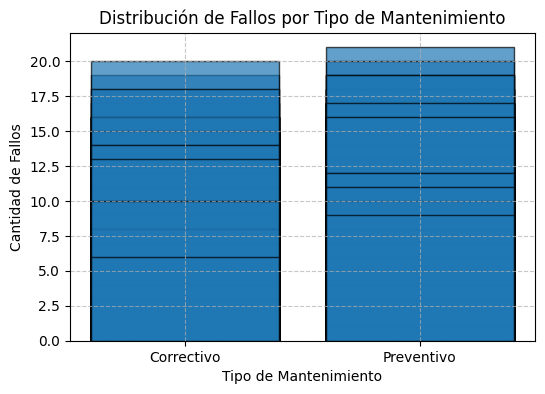

In [71]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

fallos = del_df_historicos_ordenes.sort_values('ID_Equipo').groupby(['ID_Equipo', 'Tipo_Mantenimiento'])['ID_Orden'].count().reset_index(name='Cantidad_Fallos')
fallos

# Gráfico de barras para la cantidad de fallos por tipo de mantenimiento
plt.figure(figsize=(6,4))
plt.bar(fallos['Tipo_Mantenimiento'], fallos['Cantidad_Fallos'], alpha=0.7, edgecolor='black')
plt.title('Distribución de Fallos por Tipo de Mantenimiento')
plt.xlabel('Tipo de Mantenimiento')
plt.ylabel('Cantidad de Fallos')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


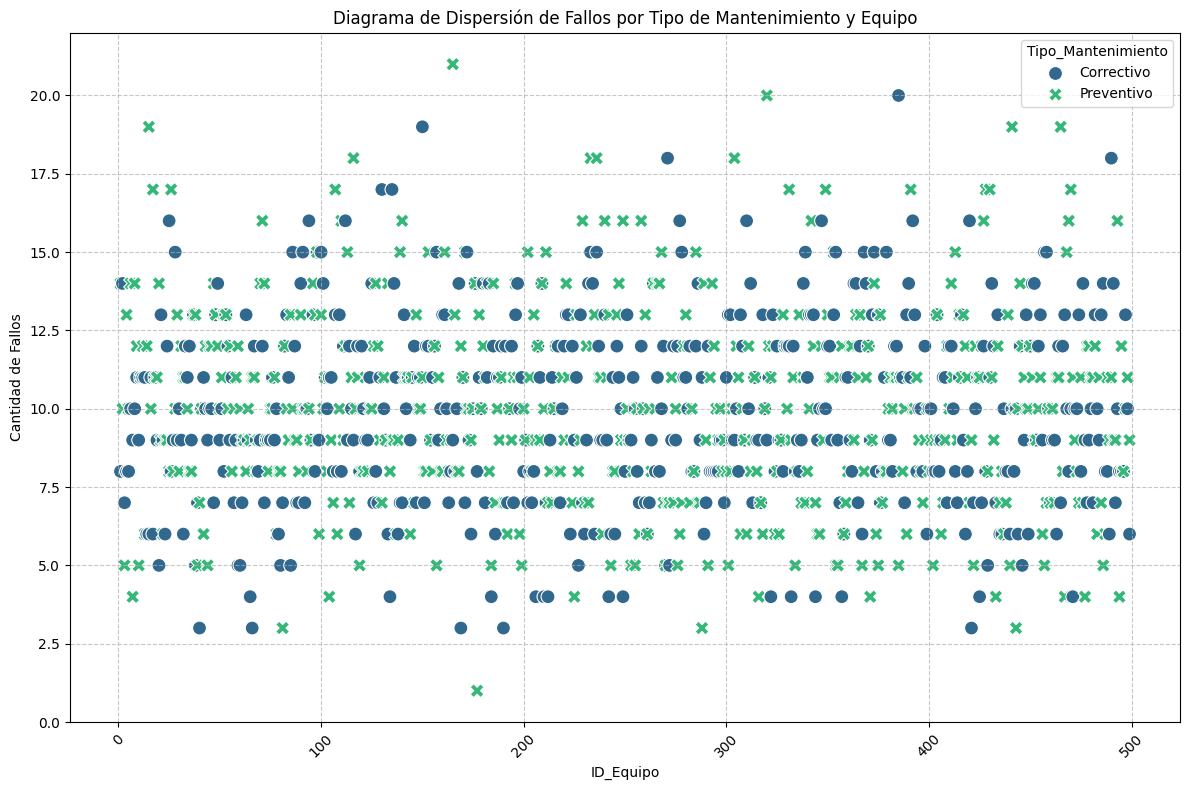

In [72]:
#Diagrama de dispersion

plt.figure(figsize=(12,8))
sns.scatterplot(data=fallos, x='ID_Equipo', y='Cantidad_Fallos', hue='Tipo_Mantenimiento', style='Tipo_Mantenimiento', s=100, palette='viridis')

plt.title('Diagrama de Dispersión de Fallos por Tipo de Mantenimiento y Equipo')
plt.xlabel('ID_Equipo')
plt.ylabel('Cantidad de Fallos')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###### Establecer posibles correlaciones entre las variables, como la relación entre las condiciones operativas (temperatura, vibración) y las horas de operación.

In [88]:
new_del_df_registros_condiciones.info()
new_del_df_registros_condiciones.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8930 entries, 0 to 8999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_Registro       8930 non-null   int64         
 1   ID_Equipo         8930 non-null   int64         
 2   Fecha             8930 non-null   datetime64[ns]
 3   Temperatura_C     8930 non-null   float64       
 4   Vibracion_mm_s    8930 non-null   float64       
 5   Horas_Operativas  8930 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 488.4 KB


ID_Registro  ID_Equipo               Fecha  Temperatura_C  Vibracion_mm_s  \
0            1        260 2020-01-01 00:00:00         101.43            1.22   
1            2        376 2020-01-01 01:00:00         118.51            2.97   
2            3        443 2020-01-01 02:00:00          76.04            2.93   
3            4        281 2020-01-01 03:00:00          97.09            3.25   
4            5        427 2020-01-01 04:00:00         139.42            4.22   

   Horas_Operativas  
0           71849.0  
1           49670.0  
2           33106.0  
3           31744.0  
4           78104.0

In [89]:
corr_registro_cond = new_del_df_registros_condiciones[['Horas_Operativas','Temperatura_C','Vibracion_mm_s']].corr()
corr_registro_cond

Horas_Operativas  Temperatura_C  Vibracion_mm_s
Horas_Operativas          1.000000       0.002953        0.004119
Temperatura_C             0.002953       1.000000        0.001410
Vibracion_mm_s            0.004119       0.001410        1.000000

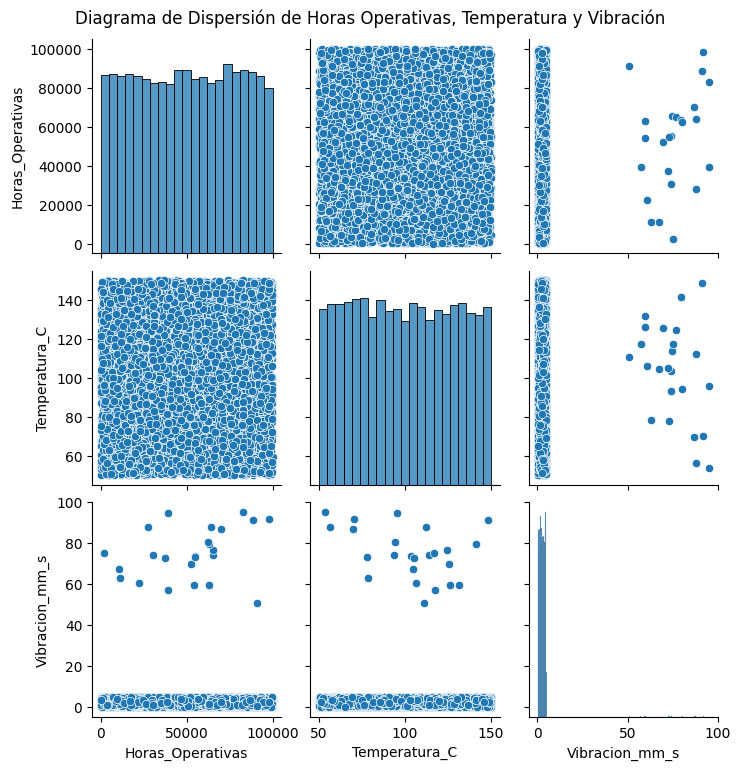

In [91]:
# Crear el diagrama de dispersión
sns.pairplot(new_del_df_registros_condiciones[['Horas_Operativas','Temperatura_C','Vibracion_mm_s']])
plt.suptitle('Diagrama de Dispersión de Horas Operativas, Temperatura y Vibración', y=1.02)
plt.show()

In [92]:
corr_registro_cond1 = new_del_df_registros_condiciones[['Horas_Operativas','Vibracion_mm_s']].corr()
corr_registro_cond1

Horas_Operativas  Vibracion_mm_s
Horas_Operativas          1.000000        0.004119
Vibracion_mm_s            0.004119        1.000000

In [93]:

corr_registro_cond2 = new_del_df_registros_condiciones[['Horas_Operativas','Temperatura_C']].corr()
corr_registro_cond2

Horas_Operativas  Temperatura_C
Horas_Operativas          1.000000       0.002953
Temperatura_C             0.002953       1.000000

#### Mezcla y Combinación de Datos

In [94]:
new_del_df_caracteristicas_equipos.info()
new_del_df_registros_condiciones.info()
del_df_historicos_ordenes.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   ID_Equipo                    499 non-null    int64   
 1   Tipo_Equipo                  499 non-null    category
 2   Fabricante                   499 non-null    category
 3   Modelo                       499 non-null    category
 4   Potencia_kW                  499 non-null    float64 
 5   Horas_Recomendadas_Revision  499 non-null    int64   
 6   Frecuencia_Mto               499 non-null    int64   
 7   Vida_Util                    499 non-null    float64 
dtypes: category(3), float64(2), int64(3)
memory usage: 21.7 KB
<class 'pandas.core.frame.DataFrame'>
Index: 8930 entries, 0 to 8999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_Registro       8930 non-n

In [95]:
equipos_info = new_del_df_caracteristicas_equipos.merge(new_del_df_registros_condiciones, on='ID_Equipo', how='outer').merge(del_df_historicos_ordenes, on='ID_Equipo', how='outer')
equipos_info.info()
equipos_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178007 entries, 0 to 178006
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   ID_Equipo                    178007 non-null  int64         
 1   Tipo_Equipo                  178007 non-null  category      
 2   Fabricante                   178007 non-null  category      
 3   Modelo                       178007 non-null  category      
 4   Potencia_kW                  178007 non-null  float64       
 5   Horas_Recomendadas_Revision  178007 non-null  int64         
 6   Frecuencia_Mto               178007 non-null  int64         
 7   Vida_Util                    178007 non-null  float64       
 8   ID_Registro                  178007 non-null  int64         
 9   Fecha_x                      178007 non-null  datetime64[ns]
 10  Temperatura_C                178007 non-null  float64       
 11  Vibracion_mm_s            

ID_Equipo Tipo_Equipo Fabricante Modelo  Potencia_kW  \
0          1   Compresor    Siemens   Z300       3429.0   
1          1   Compresor    Siemens   Z300       3429.0   
2          1   Compresor    Siemens   Z300       3429.0   
3          1   Compresor    Siemens   Z300       3429.0   
4          1   Compresor    Siemens   Z300       3429.0   

   Horas_Recomendadas_Revision  Frecuencia_Mto  Vida_Util  ID_Registro  \
0                         7725              22   870072.0           28   
1                         7725              22   870072.0           28   
2                         7725              22   870072.0           28   
3                         7725              22   870072.0           28   
4                         7725              22   870072.0           28   

              Fecha_x  Temperatura_C  Vibracion_mm_s  Horas_Operativas  \
0 2020-01-02 03:00:00           93.8             0.7           80054.0   
1 2020-01-02 03:00:00           93.8             0.7           80054.0   
2 2020-01-02 03:00:00           93.8             0.7           80054.0   
3 2020-01-02 03:00:00           93.8             0.7           80054.0   
4 2020-01-02 03:00:00           93.8             0.7           80054.0   

   ID_Orden             Fecha_y Tipo_Mantenimiento  Costo_Mantenimiento  \
0       799 2020-02-03 06:00:00         Preventivo               404.72   
1       837 2020-02-04 20:00:00         Correctivo              7465.08   
2      1344 2020-02-25 23:00:00         Correctivo              7577.35   
3      1836 2020-03-17 11:00:00         Correctivo              5227.75   
4      2103 2020-03-28 14:00:00         Preventivo              6879.63   

   Duracion_Horas     Ubicacion  
0              37  Planta Oeste  
1              39   Planta Este  
2              40  Planta Norte  
3              17  Planta Oeste  
4              16  Planta Oeste

In [97]:

equipos_info.to_csv('../output/equipos_info.csv', index=False)




OSError: Cannot save file into a non-existent directory: '../powergen-predictivo2/output'